In [66]:
import pandas as pd
df=pd.read_csv('../data/IMDB_four_genre_larger_plot_description.csv')
df.head()

,movie_id,description,genre
0,tt12783454,Elle Evans (Joey King) has finally completed h...,romance
1,tt1798632,A young girl tries to understand how she myste...,horror
2,tt9214832,"In 1800s England, a well meaning but selfish y...",comedy
3,tt8522006,Abby Holland (Kristen Stewart) and Harper Cald...,romance
4,tt21249656,Olga and Maks are 15 years apart. She is a suc...,romance


In [67]:
import os
import cv2
def get_images(folder):
    folder_opened = os.path.normpath(folder)
    sub_folders=os.listdir(folder_opened)
    lst=[]
    for sub in sub_folders:
        sub_opened=os.path.join(folder_opened,sub)
        for file in os.listdir(sub_opened):
           path_image=os.path.join(sub_opened,file)
           image_path = './' + path_image
           img=cv2.imread(image_path)
           rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
           lst.append({
                   "movie_id":os.path.splitext(file)[0],
                   "Genre":sub,
                   "Image":rgb_img
               })
    return pd.DataFrame(lst)
Movies=get_images('../IMDB_four_genre_posters')

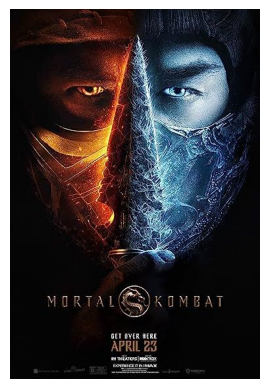

In [68]:
import matplotlib.pyplot as plt


plt.imshow(Movies['Image'][0])
plt.axis('off')
plt.show()


In [69]:
df.head()

,movie_id,description,genre
0,tt12783454,Elle Evans (Joey King) has finally completed h...,romance
1,tt1798632,A young girl tries to understand how she myste...,horror
2,tt9214832,"In 1800s England, a well meaning but selfish y...",comedy
3,tt8522006,Abby Holland (Kristen Stewart) and Harper Cald...,romance
4,tt21249656,Olga and Maks are 15 years apart. She is a suc...,romance


In [70]:
merged=pd.merge(df, Movies, on='movie_id')

In [71]:
merged.drop('Genre',axis=1,inplace=True)

In [72]:
merged.drop_duplicates(subset=['movie_id', 'description', 'genre'], keep='first', inplace=True)

In [73]:
merged.head()

,movie_id,description,genre,Image
0,tt1798632,A young girl tries to understand how she myste...,horror,"[[[35, 11, 11], [35, 11, 11], [35, 11, 11], [3..."
1,tt9214832,"In 1800s England, a well meaning but selfish y...",comedy,"[[[75, 105, 97], [69, 99, 91], [60, 89, 84], [..."
3,tt21249656,Olga and Maks are 15 years apart. She is a suc...,romance,"[[[254, 254, 254], [254, 254, 254], [254, 254,..."
4,tt7149730,A reformed hunter living in isolation on a wil...,action,"[[[77, 88, 94], [74, 85, 91], [70, 81, 87], [6..."
5,tt3876910,A reformed sociopath journeys to a remote isla...,action,"[[[244, 228, 195], [244, 228, 195], [244, 228,..."


In [74]:
merged.to_csv('../data/Combined.csv')

In [75]:
df.head()

,movie_id,description,genre
0,tt12783454,Elle Evans (Joey King) has finally completed h...,romance
1,tt1798632,A young girl tries to understand how she myste...,horror
2,tt9214832,"In 1800s England, a well meaning but selfish y...",comedy
3,tt8522006,Abby Holland (Kristen Stewart) and Harper Cald...,romance
4,tt21249656,Olga and Maks are 15 years apart. She is a suc...,romance


In [76]:
df.drop('movie_id',axis=1,inplace=True)
df.head()

,description,genre
0,Elle Evans (Joey King) has finally completed h...,romance
1,A young girl tries to understand how she myste...,horror
2,"In 1800s England, a well meaning but selfish y...",comedy
3,Abby Holland (Kristen Stewart) and Harper Cald...,romance
4,Olga and Maks are 15 years apart. She is a suc...,romance


# Action Data

In [77]:
df2=pd.read_csv('../data/action.csv')
df2=df2[['description','genre']]
df2['genre']=df2['genre'].apply(lambda x: 'action' if x.lower().find('action')!=-1 else None)
df2=df2.dropna()
df2.head()

,description,genre
0,The people of Wakanda fight to protect their h...,action
1,Jake Sully lives with his newfound family form...,action
2,A pilot finds himself caught in a war zone aft...,action
3,A middle-aged Chinese immigrant is swept up in...,action
4,Dom Toretto and his family are targeted by the...,action


# Horror data

In [78]:
df3=pd.read_csv('../data/horror.csv')
df3=df3[['description','genre']]
df3['genre']=df3['genre'].apply(lambda x: 'horror' if x.lower().find('horror')!=-1 else None)
df3=df3.dropna()
df3.head()

,description,genre
0,"While vacationing, a girl and her parents are ...",horror
1,A young couple travels to a remote island to e...,horror
2,A robotics engineer at a toy company builds a ...,horror
3,Thale (17) has just moved with her parents to ...,horror
4,James and Em Foster are enjoying an all-inclus...,horror


# Romance Data

In [79]:
df4=pd.read_csv('../data/romance.csv')
df4=df4[['description','genre']]
df4['genre']=df4['genre'].apply(lambda x: 'romance' if x.lower().find('romance')!=-1 else None)
df4=df4.dropna()
df4.head()

,description,genre
2,Two long-distance best friends change each oth...,romance
4,"On a trip to her hometown, workaholic Ally rem...",romance
5,A seventeen-year-old aristocrat falls in love ...,romance
7,"Follows a new couple and their families, who f...",romance
8,A drama about the power of human connection du...,romance


# Merging

In [80]:
final_df=pd.concat([df,df2,df3,df4])

In [81]:
final_df=final_df.drop_duplicates(subset='description')

In [82]:
final_df.to_csv('../data/Description.csv')